# PLANT DISEASES DETECTION MODEL

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

Using TensorFlow backend.


'2.2.0'

### LOADING IMAGE DATASET

In [2]:
# Image augmentation to avoid over training of the model and feature scaling
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train', target_size = (224,224), batch_size = 128, class_mode = 'categorical')

Found 68653 images belonging to 37 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid', target_size = (224,224), batch_size = 85, class_mode = 'categorical')

Found 17162 images belonging to 37 classes.


In [4]:
train_num = training_set.samples
test_num = test_set.samples
print(train_num)
print(test_num)

68653
17162


### BUILDING CNN MODEL BASED ON ALEXNET ARCHITECTURE

In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 11, strides = (4,4), padding='valid', activation = 'relu', input_shape = [224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 11, strides = (1,1), padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides = (1,1), padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides = (1,1), padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = (1,1), padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding='valid'))


cnn.add(tf.keras.layers.Flatten())

In [6]:
#input layer and first hidden layer
cnn.add(tf.keras.layers.Dense(units = 4096, activation = 'relu'))
# second and third hidden layer
cnn.add(tf.keras.layers.Dense(units = 4096, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 1000, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 37, activation = 'softmax'))

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)         8

In [8]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### TRAINING THE MODEL

In [9]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [11]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25, steps_per_epoch = train_num // 128, validation_steps = test_num // 128, callbacks=[model_checkpoint_callback])

Epoch 1/25
536/536 [==============================] - 3653s 7s/step - loss: 1.8749 - accuracy: 0.4247 - val_loss: 1.4192 - val_accuracy: 0.5443
Epoch 2/25
536/536 [==============================] - 2224s 4s/step - loss: 1.4068 - accuracy: 0.5596 - val_loss: 1.1777 - val_accuracy: 0.6197
Epoch 3/25
536/536 [==============================] - 1038s 2s/step - loss: 1.1336 - accuracy: 0.6405 - val_loss: 0.9601 - val_accuracy: 0.6954
Epoch 4/25
536/536 [==============================] - 3196s 6s/step - loss: 0.9401 - accuracy: 0.6983 - val_loss: 0.7954 - val_accuracy: 0.7397
Epoch 5/25
536/536 [==============================] - 2178s 4s/step - loss: 0.7999 - accuracy: 0.7409 - val_loss: 0.6870 - val_accuracy: 0.7753
Epoch 6/25
536/536 [==============================] - 969s 2s/step - loss: 0.7087 - accuracy: 0.7706 - val_loss: 0.6650 - val_accuracy: 0.7802
Epoch 7/25
536/536 [==============================] - 1970s 4s/step - loss: 0.6501 - accuracy: 0.7880 - val_loss: 0.5813 - val_accuracy: 

In [14]:
class_distinct = training_set.class_indices
print(class_distinct)

list_class = list(class_distinct.keys())
print(list_class)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Orange___Haunglongbing_(Citrus_greening)': 14, 'Peach___Bacterial_spot': 15, 'Peach___healthy': 16, 'Pepper,_bell___Bacterial_spot': 17, 'Pepper,_bell___healthy': 18, 'Potato___Early_blight': 19, 'Potato___Late_blight': 20, 'Potato___healthy': 21, 'Raspberry___healthy': 22, 'Soybean___healthy': 23, 'Squash___Powdery_mildew': 24, 'Strawberry___Leaf_scorch': 25, 'Strawberry___healthy': 26, 'Tomato___Bacterial_spot': 27, 'Tomato___Early_blight': 28, 'Tomato___Late_blight': 29, 'Tomato___Leaf_Mold': 30, 'Tomato___Septoria_leaf_spot': 31, 'Tom

### PREDICTION

Predicted class


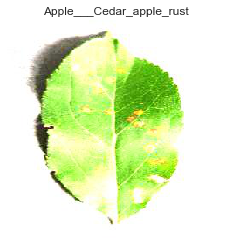

In [20]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

image_path = "test/test/AppleCedarRust1.jpg"
new_image = image.load_img(image_path, target_size = (224,224))
img = image.img_to_array(new_image)
img = np.expand_dims(img, axis = 0)
img = img/255

print("Predicted class")
prediction = cnn.predict(img)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = list_class[index]
        

#plt.figure(figsize(4,4))
plt.imshow(new_image)
plt.axis('off')
plt.title(class_name)
plt.show()

Predicted class


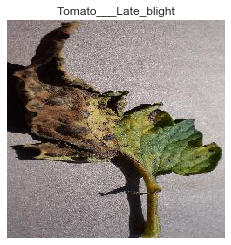

In [22]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

image_path = "test/test/TomatoEarlyBlight1.jpg"
new_image = image.load_img(image_path, target_size = (224,224))
img = image.img_to_array(new_image)
img = np.expand_dims(img, axis = 0)
img = img/255

print("Predicted class")
prediction = cnn.predict(img)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = list_class[index]
        

#plt.figure(figsize(4,4))
plt.imshow(new_image)
plt.axis('off')
plt.title(class_name)
plt.show()

Predicted class


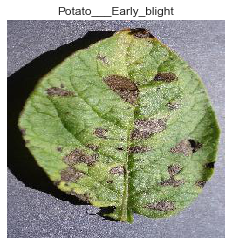

In [23]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

image_path = "test/test/PotatoEarlyBlight2.jpg"
new_image = image.load_img(image_path, target_size = (224,224))
img = image.img_to_array(new_image)
img = np.expand_dims(img, axis = 0)
img = img/255

print("Predicted class")
prediction = cnn.predict(img)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = list_class[index]
        

#plt.figure(figsize(4,4))
plt.imshow(new_image)
plt.axis('off')
plt.title(class_name)
plt.show()

Predicted class


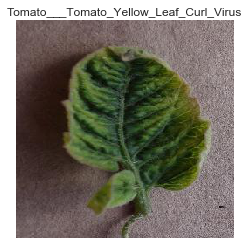

In [24]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

image_path = "test/test/TomatoYellowCurlVirus2.jpg"
new_image = image.load_img(image_path, target_size = (224,224))
img = image.img_to_array(new_image)
img = np.expand_dims(img, axis = 0)
img = img/255

print("Predicted class")
prediction = cnn.predict(img)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = list_class[index]
        

#plt.figure(figsize(4,4))
plt.imshow(new_image)
plt.axis('off')
plt.title(class_name)
plt.show()

Predicted class


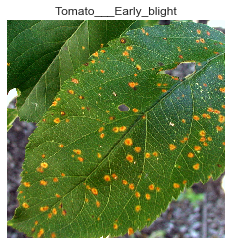

In [25]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

image_path = "test/test/spots-Orange-cedar-apple-rust-disease-apple-leaf.jpg"
new_image = image.load_img(image_path, target_size = (224,224))
img = image.img_to_array(new_image)
img = np.expand_dims(img, axis = 0)
img = img/255

print("Predicted class")
prediction = cnn.predict(img)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = list_class[index]
        

#plt.figure(figsize(4,4))
plt.imshow(new_image)
plt.axis('off')
plt.title(class_name)
plt.show()

### RESULTS AND GRAPHS

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

results = pd.read_csv("Train_results.csv")
results

,Epochs,Loss,Accuracy,Time,Time per step,Val_loss,Val_accuracy
0,1,1.8749,0.4247,3653,7,1.4192,0.5443
1,2,1.4068,0.5596,2224,4,1.1777,0.6197
2,3,1.1336,0.6405,1038,2,0.9601,0.6954
3,4,0.9401,0.6983,3196,6,0.7954,0.7397
4,5,0.7999,0.7409,2178,4,0.6870,0.7753
5,6,0.7087,0.7706,969,2,0.6650,0.7802
6,7,0.6501,0.7880,1970,4,0.5813,0.8105
7,8,0.5783,0.8125,1714,3,0.5991,0.8101
8,9,0.5505,0.8223,990,2,0.5214,0.8320
9,10,0.4991,0.8393,974,2,0.4963,0.8340


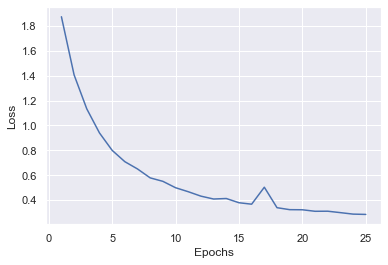

In [28]:
ax = sns.lineplot(x="Epochs", y="Loss", data = results)

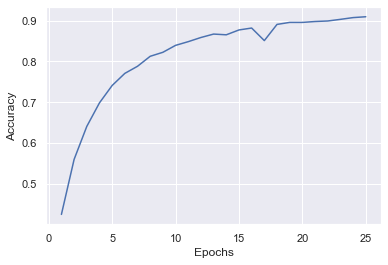

In [29]:
ax = sns.lineplot(x="Epochs", y="Accuracy", data = results)

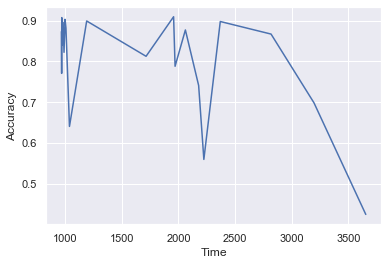

In [30]:
ax = sns.lineplot(x="Time", y="Accuracy", data = results)

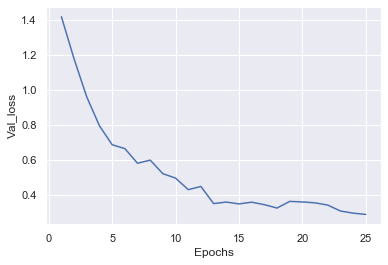

In [31]:
bx = sns.lineplot(x="Epochs", y="Val_loss", data = results)

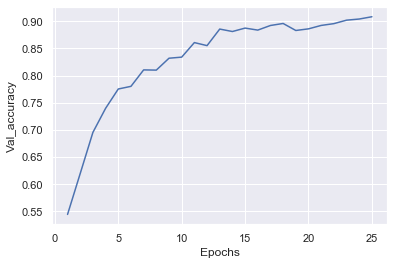

In [32]:
bx = sns.lineplot(x="Epochs", y="Val_accuracy", data = results)

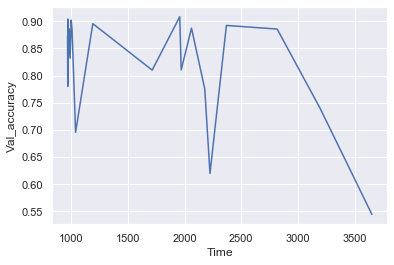

In [33]:
bx = sns.lineplot(x="Time", y="Val_accuracy", data = results)

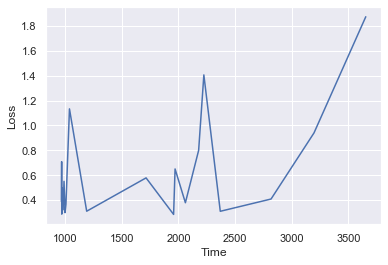

In [34]:
bx = sns.lineplot(x="Time", y="Loss", data = results)

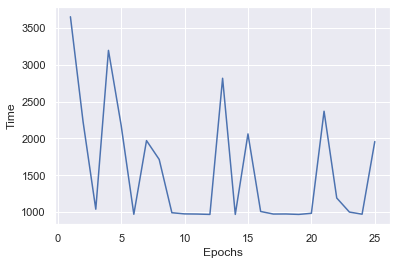

In [35]:
bx = sns.lineplot(x="Epochs", y="Time", data = results)

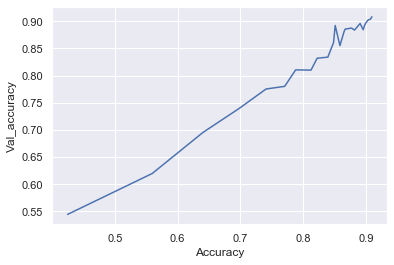

In [36]:
bx = sns.lineplot(x="Accuracy", y="Val_accuracy", data = results)

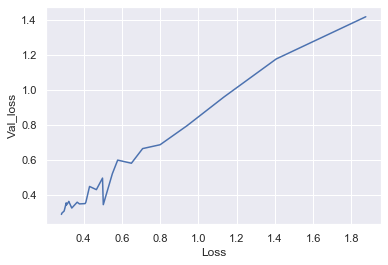

In [37]:
bx = sns.lineplot(x="Loss", y="Val_loss", data = results)

In [40]:
cnn.history